In [174]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

In [175]:
fully_mined_pro = pd.read_csv("./data/fullyMinedSumonerPUUID_ProPlayers_Rank.csv", header=None)
fully_mind_avg = pd.read_csv("./data/fullyMinedSumonerPUUID_RankAvgPlayers.csv", header=None)

In [176]:
fully_mined_pro.columns = ["PUUID", "Rank"]
fully_mind_avg.columns = ["PUUID", "Rank"]

In [177]:
RanksPro = fully_mined_pro["Rank"]
RanksAvg = fully_mind_avg["Rank"]

In [178]:
Pro_Rank_Grouped = fully_mined_pro.groupby("Rank").size()
Avg_Rank_Grouped = fully_mind_avg.groupby("Rank").size()

In [180]:
fully_mind_avg.loc[len(fully_mind_avg.index)] = ["FillerPUUIDChallenger" , "Challenger"]   #Grandmaster, Challenger, Master Missing
fully_mind_avg.loc[len(fully_mind_avg.index)] = ["FillerPUUIDGrandmaster" , "Grandmaster"]
fully_mind_avg.loc[len(fully_mind_avg.index)] = ["FillerPUUIDMaster" , "Master"]

In [182]:

Clean_df_avg = fully_mind_avg[fully_mind_avg.Rank != "Unknown"]
Clean_df_pro = fully_mined_pro[fully_mined_pro.Rank != "Unknown"]

In [183]:

df_mapping = pd.DataFrame({
    'Rank':["Challenger" , "Grandmaster" , "Master", "Diamond" , "Platinum", "Gold", "Silver", "Bronze", "Iron"],
})

sort_mapping = df_mapping.reset_index().set_index('Rank')

In [184]:
Clean_df_pro['RankNum'] = Clean_df_pro['Rank'].map(sort_mapping['index'])
Clean_df_pro = Clean_df_pro.sort_values('RankNum')

Clean_df_avg['RankNum'] = Clean_df_avg['Rank'].map(sort_mapping['index'])
Clean_df_avg = Clean_df_avg.sort_values('RankNum')



C:\Users\stefa\AppData\Local\Temp\ipykernel_14308\2259638034.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Clean_df_pro['RankNum'] = Clean_df_pro['Rank'].map(sort_mapping['index'])
C:\Users\stefa\AppData\Local\Temp\ipykernel_14308\2259638034.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Clean_df_avg['RankNum'] = Clean_df_avg['Rank'].map(sort_mapping['index'])


In [185]:
Clean_df_pro

,PUUID,Rank,RankNum
1310,ecYYvuzy4CSbhp0ZQEuHf7Sm-eqhZuDPw6fhr3n5MpckR8...,Challenger,0
1207,1gybheTwOx3ElL7PpofPk9D2wsfHOk6T-gTSSgCcEJyOKN...,Grandmaster,1
3050,_jtLMdbJ6-s95YwSYewiLRDgPnQlSWepv6Qvx_-0ZGEzK0...,Master,2
984,MyAVszhVsj0fEgY8U9xJ4rwrCHT5nmDHgY5nCWm1LPhUg_...,Master,2
983,U3vrcVUENWOm-dKF-DGqTzFgF4twPd-bnNk5cw09E06_Dh...,Master,2
...,...,...,...
1327,DI2-ImEabbMIJJM2T_xb4YuUQTcyi9r2IfzF1GkWxTwtWT...,Silver,6
808,9qndFdTQIuLZOT7WSufVnjha8r3pbNqZMKnp6COEcMMM5x...,Silver,6
49,6_re5a4AK9kWyJpBmZDbUQPHEZPwwCaCk6RSEd3ZAhlmm8...,Silver,6
1284,Zk4FEJbN_gAp59lGfYtOI_mSodYzUfaJrb_i2dbgZuKQYv...,Bronze,7


In [186]:
Clean_df_avg

,PUUID,Rank,RankNum
1982,FillerPUUIDChallenger,Challenger,0
1983,FillerPUUIDGrandmaster,Grandmaster,1
1984,FillerPUUIDMaster,Master,2
1342,z6BHgvT0EkxhU4oBZE9b_mPY9ixPiH5hxuXryDvOMXS_sy...,Diamond,3
1308,12TFCB3EIkmn2ewIX-44fCMI4hvtVZNhQDGIwMC5MLAmGX...,Diamond,3
...,...,...,...
1375,zbR4CuQmfGvxe-DSKk6x2Mizx6EwViTv9s1NVqUZ8UrDO5...,Bronze,7
25,ZGh7aJpxZfQbcEAl8tXmR8a7VycscjdUxfu3ujPrmTJ2gJ...,Iron,8
87,dNwov98f68U1ux79HUCGO4AKf5BWERuwCx0QWq1uzEalZX...,Iron,8
74,h_57_3MALZjii77O-2LHLOx4YQhKXM6hOI4GZcmqyUnzBz...,Iron,8


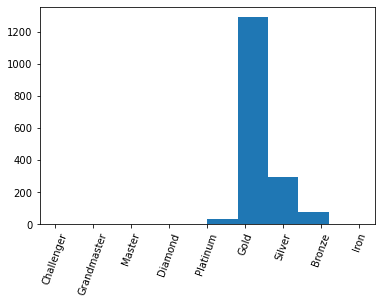

In [187]:
plt.hist(Clean_df_avg["Rank"])
plt.xticks(rotation=70)

plt.show()

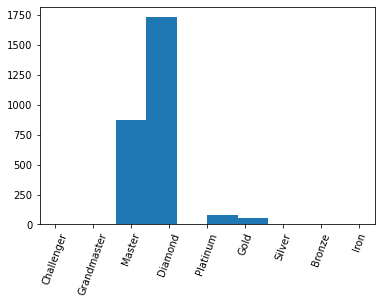

In [188]:
plt.hist(Clean_df_pro["Rank"])
plt.xticks(rotation=70)

plt.show()